## Problem Statement 

Seguro has been struggling to price their premiums which effects the good drivers by increasing their premiums due to bad drivers. Seguro intends to use predictive modelling to make their premium pricing fair and prevent penalizing good drivers due to the behavior of bad ones. Thus, problem statement is to predict which drivers will file for insurance claim next year.

## Data Description 

In this competition, you will predict the probability that an auto insurance policy holder files a claim.

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

The above data description is taken from Kaggle. This is the only description available and thus it will affect the decision making for preprocessing. 

In [1]:
import os # For file operations . 
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['Path'] = mingw_path + ';' + os.environ['Path']
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [3]:
import numpy as np # numpy is used for the variety of datastructures it provides to python environment. 
import pandas as pd #  is used for the variety of datastructures it provides to python environment. 

import missingno as mg # missing value vizualizations
%matplotlib inline 
import seaborn as sns # vizualization module
import matplotlib.pyplot as plt # Vizualization module
from fancyimpute import MICE # Imputation algorithms for missing values
from sklearn.preprocessing import Imputer # Imputations by mean median and mode of missing values
from sklearn.decomposition import PCA # Dimension reduction by PCA
from scipy.stats import mstats # Module for basic statistics
from sklearn.model_selection import train_test_split # Splitting the data into test and train.
from imblearn.over_sampling import RandomOverSampler # For oversampling the data to combat imbalanced data.

from sklearn.metrics import accuracy_score # Accuracy metric 
from sklearn.model_selection import GridSearchCV # K fold crossvalidation and tuning hyperparameters. 
from sklearn.neural_network import MLPClassifier # ANN object imported from  sklearn
from sklearn.metrics import cohen_kappa_score, make_scorer # KAppa model selection metric for imbalanced data
from sklearn.externals import joblib # exporting and importing of models . 

from sklearn.cluster import KMeans # Getting the object for Kmeans clustering 
from sklearn import metrics
from scipy.spatial.distance import cdist # Importing cluster distance calculation metrics. 
from sklearn.metrics import silhouette_score

from sklearn.mixture import GaussianMixture
from scipy.spatial import distance

from sklearn.model_selection import StratifiedKFold

In [5]:
os.chdir("C:/Users/prady/Desktop/Folders/Kaggle AMOD/Seguro") # Setting up working directory. 

In [6]:
data= pd.read_csv("train.csv") # Importing train set .



In [7]:
data=data.replace(-1,np.NaN ) # Missing values in this dataset are denoted by -1. Thus the missing values are being converted to   
data=data.drop('id', axis=1) # removing id column from the dataset. 


In [8]:
# Getting the dimensions of test and train dataset. 
print(np.shape(data))


(595212, 58)


In [9]:
data.groupby('target').count()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
target,,,,,,,,,,,,,,,,,,,,,
0,573518,573342,573518,573468,568193,573518,573518,573518,573518,573518,...,573518,573518,573518,573518,573518,573518,573518,573518,573518,573518
1,21694,21654,21694,21661,21210,21694,21694,21694,21694,21694,...,21694,21694,21694,21694,21694,21694,21694,21694,21694,21694


In [10]:
np.count_nonzero(data.isnull())  # Counting the number of missing values 

846458

In [11]:
data

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2.0,5,1.0,0.0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0,1,1.0,7,0.0,0.0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,0,5,4.0,9,1.0,0.0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,0,0,1.0,2,0.0,0.0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,0,2.0,0,1.0,0.0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
5,0,5,1.0,4,0.0,0.0,0,0,0,1,...,4,2,0,9,0,1,0,1,1,1
6,0,2,1.0,3,1.0,0.0,0,1,0,0,...,3,0,0,10,0,1,0,0,1,0
7,0,5,1.0,4,0.0,0.0,1,0,0,0,...,7,1,3,6,1,0,1,0,1,0
8,0,5,1.0,3,1.0,0.0,0,0,1,0,...,4,2,1,5,0,1,0,0,0,1
9,1,1,1.0,2,0.0,0.0,0,1,0,0,...,3,5,0,6,0,1,0,0,1,0


## Data Vizualization 

### Generating Meta Data 

In [12]:
cat_names = [] # Empty list to store names of categorical variables . 
bin_names = [] # Empty list to store the names of binary variables . 
interval_names = [] # Empty list to store continious variables names .  
ordinal_names = [] # Empty list to store ordinal variable names . 


In [13]:
'''In this dataset , the variable names which have "bin" are binary , "cat" are categorical. 
The variables with names other than these are either integer or ordinal. '''

coln=list(data)   # A list of all the columns in the dataset . 
for i in coln :
    
    if  "cat" in i :            # Checking if the column name string is categorical or not.  
  
        cat_names.append(i)


    elif "bin" in i or i=="target"  :  # Checking if the column name string is binary or not . 
        
        bin_names.append(i)
    
    elif  data[i].dtypes == float: # Checking for interval level variables. 
        interval_names.append(i)
    
    
    elif data[i].dtypes == 'int64' :  # Checking for Ordinal level variables . 
        ordinal_names.append(i)
   

In [14]:
bin_names.remove("target")

### Vizualizing missing data

#### Bar Plot

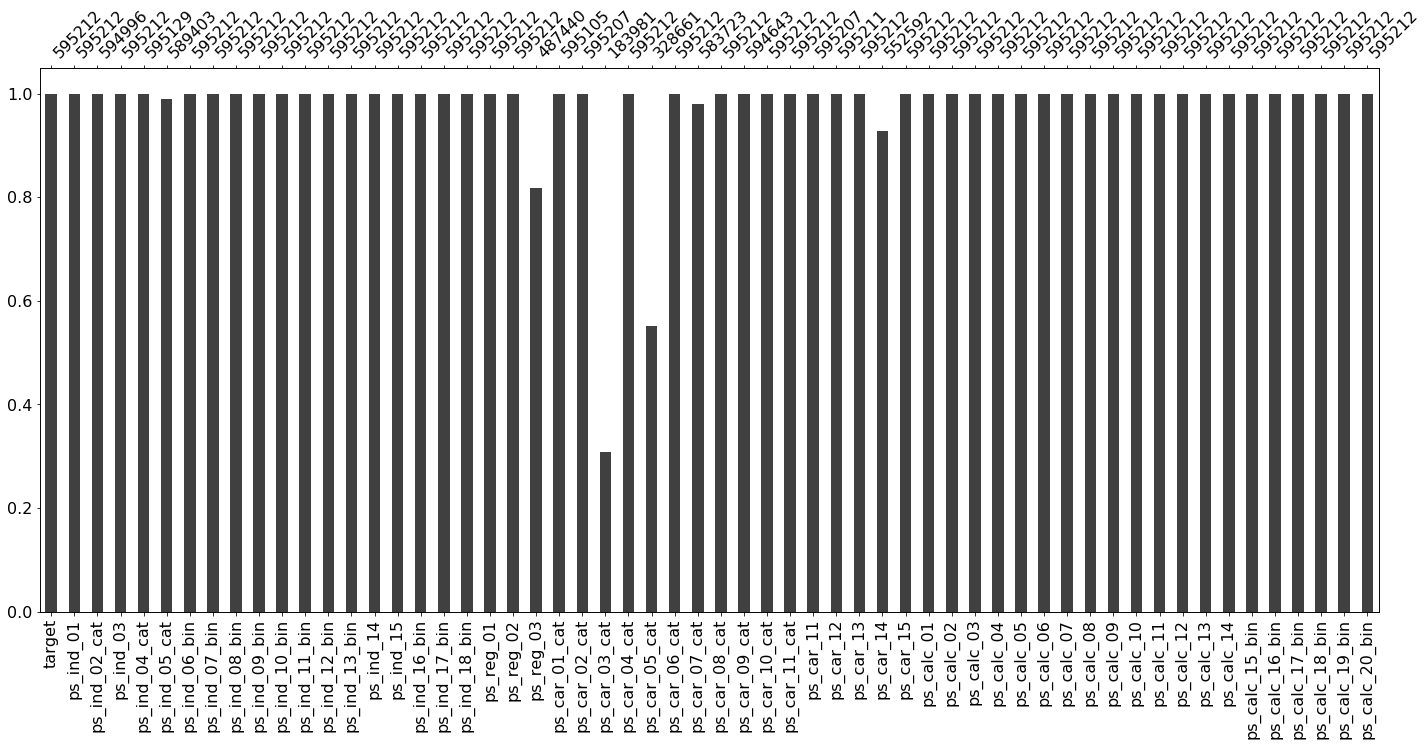

In [15]:
mg.bar(data) # bar plot for chekcing the percentage of missing values in the variables present . 

From the plot below , there are a few variables of concern as given below.     
1. ps_reg_03 : Amount of missing values are about 18 %      
2. ps_car_03_cat : Amount of missing values are about 70 %   
3. ps_car_05_cat : Amount of missing values are about 55 %   
4. ps_car_14 : Amount of missing values are about 5 %   

Rest of the  variables have minimal amount of missing values.  

#### Heat Map for missing values

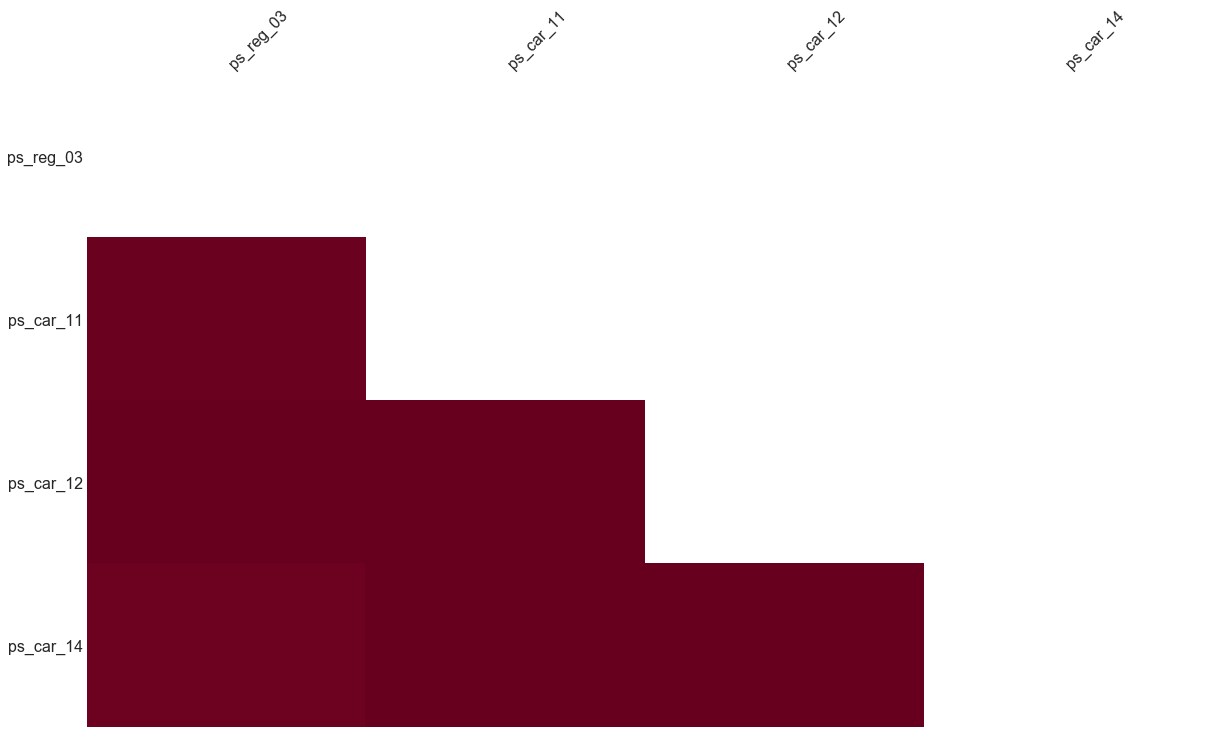

In [22]:
mg.heatmap(data[interval_names])

The above heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another. In this case the missing values of all interval level variables do not affect other variables. 

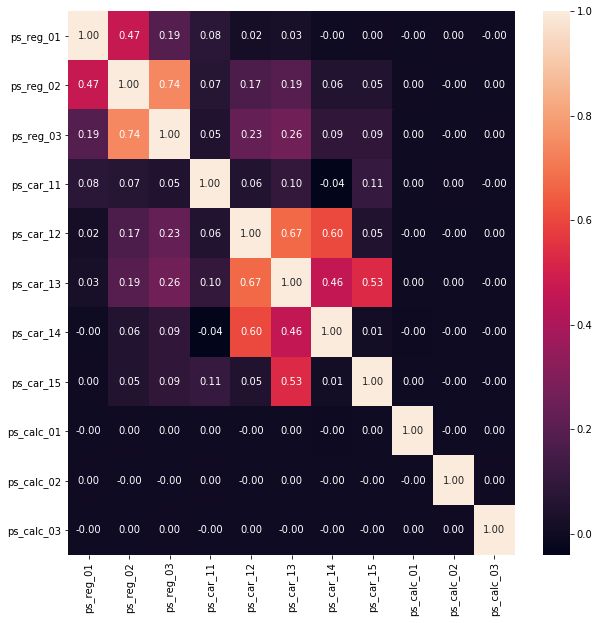

In [17]:
#data_rmna = data.dropna(inplace=True) # Dropping the na values for the sake of Data Vizualization and exploration. 
corr = data[interval_names].corr() # Calculating a correlation matrix for vizualizing the heat map . 
fig, ax = plt.subplots(figsize=(10,10))  # Increasing the size of the figure. 
sns.heatmap(corr , ax = ax , annot = True ,fmt = '.2f')  # Heatmap with correlation coefficient values rounded to two decimal places
        

#### Count Plots for Categorical variables. 

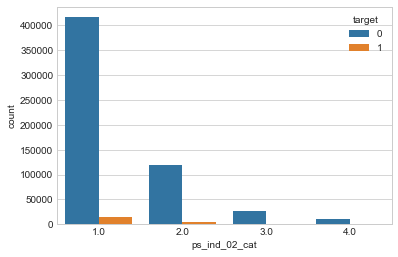

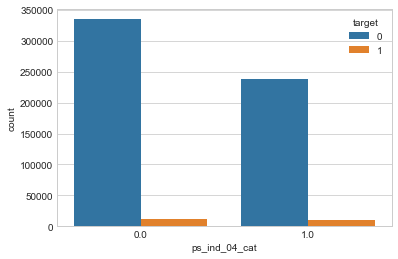

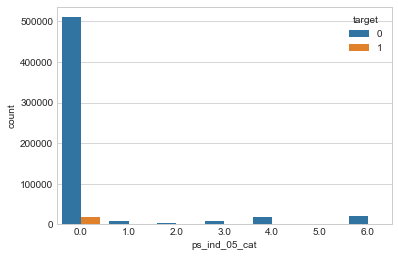

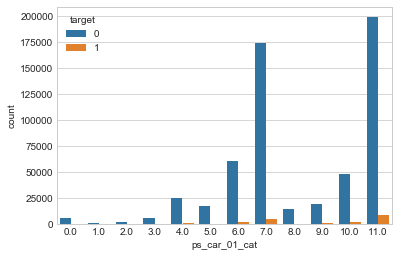

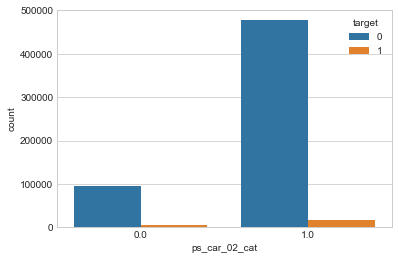

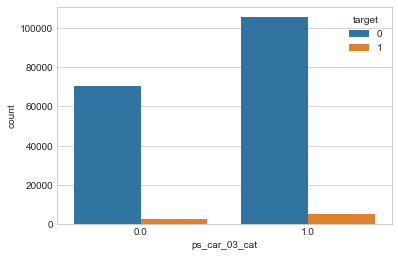

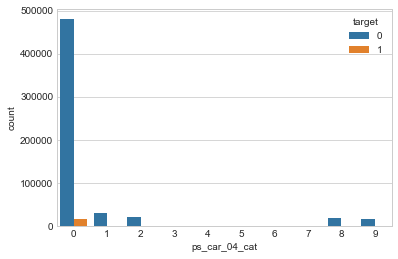

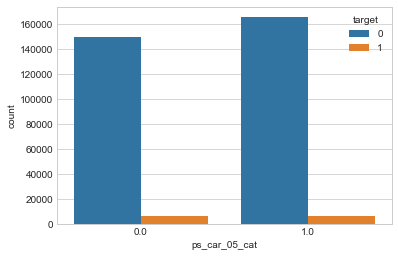

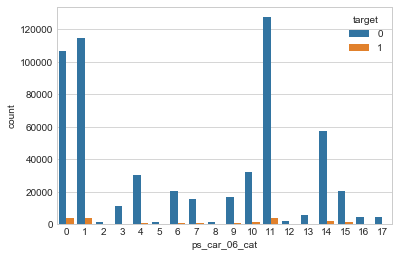

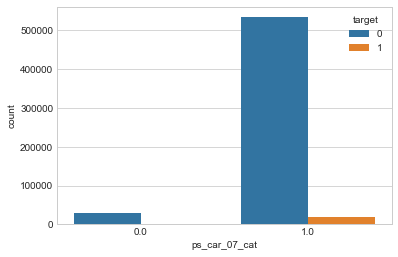

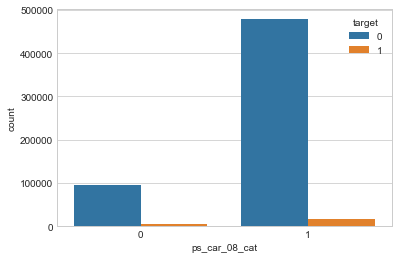

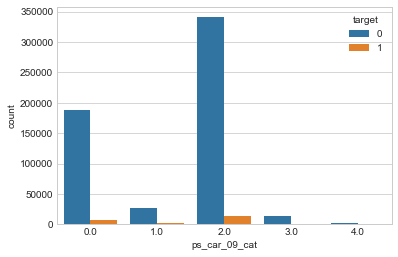

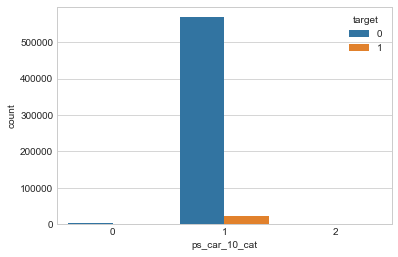

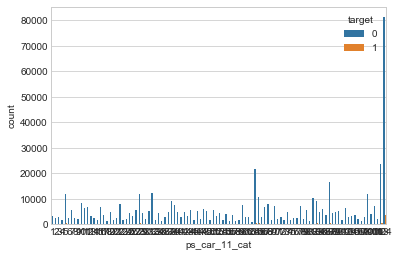

In [18]:
for i in cat_names : 
    sns.set_style('whitegrid')
    plt.figure(i)
    sns.countplot(x=i, data=data, hue="target")
   

The categorical variables count plot shows the massive problem of imbalance in the data. The variable ps_car_11_cat which would obviously require some kind of dimension reduction technique after one hot encoding. 

#### Count Plots for Binary Categorical Variables 

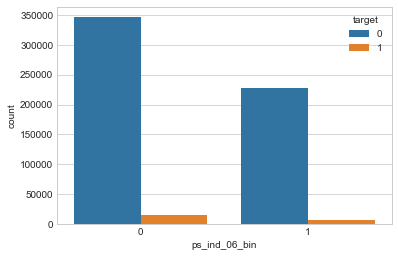

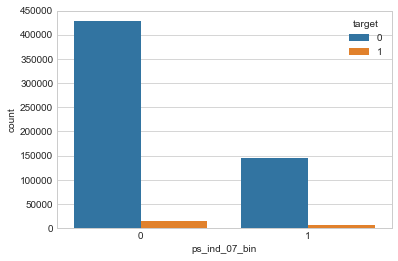

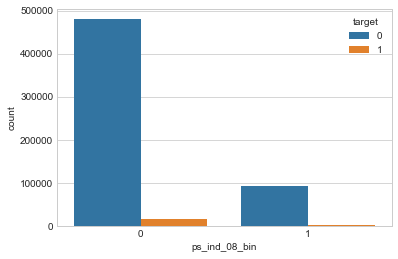

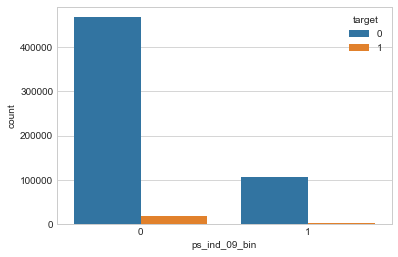

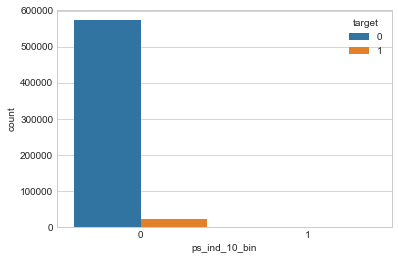

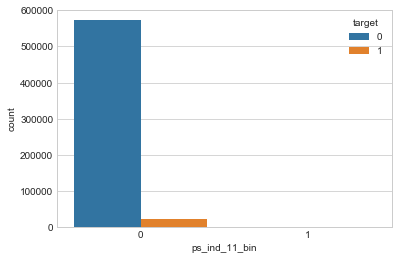

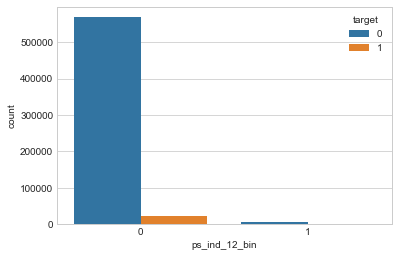

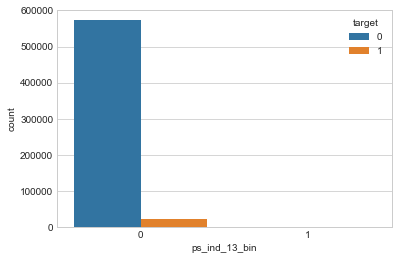

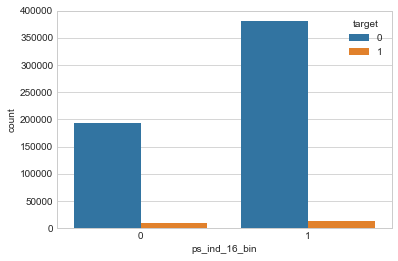

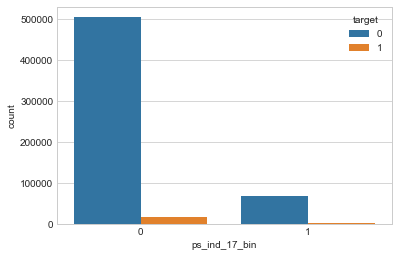

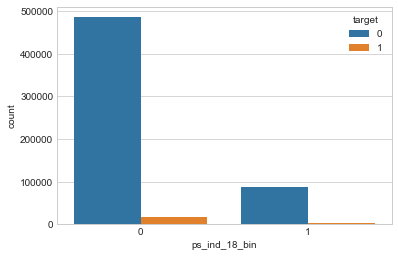

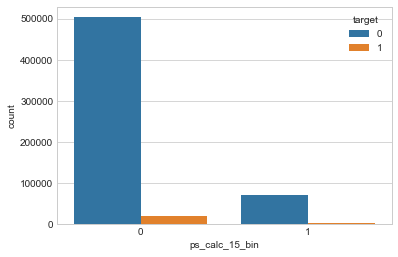

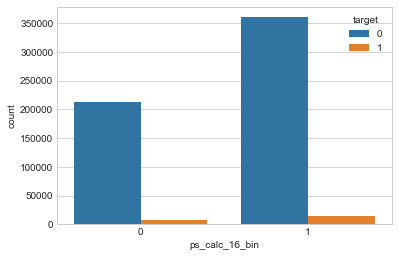

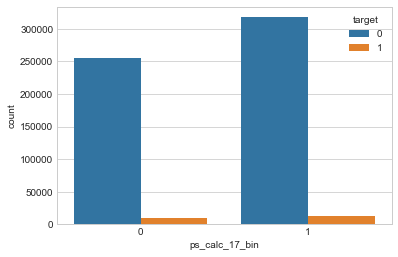

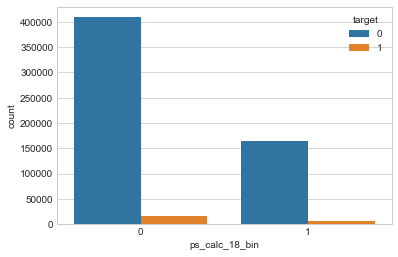

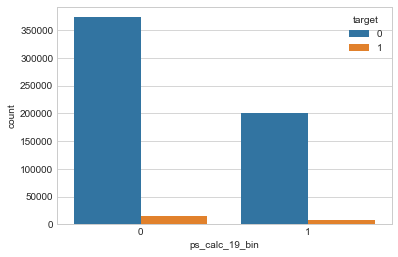

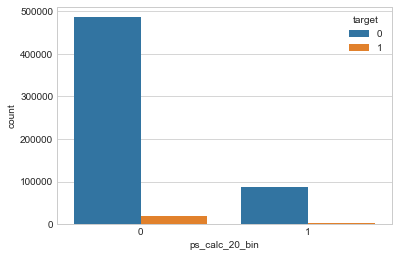

In [19]:
for i in bin_names : 
    sns.set_style('whitegrid')
    plt.figure(i)
    sns.countplot(x=i,data=data, hue="target")
    

The countplots above again show the massive problem of unbalanced data. 

#### Density Plots for Interval Level Variables 

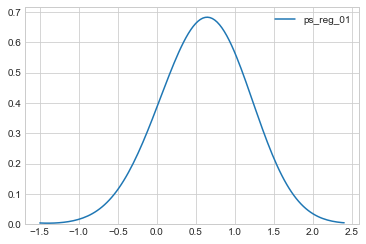

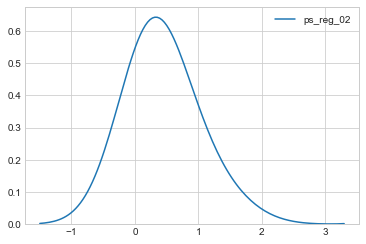

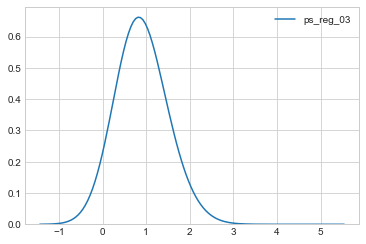

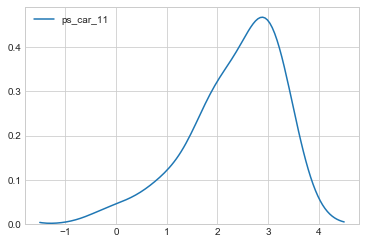

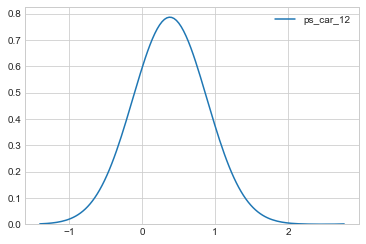

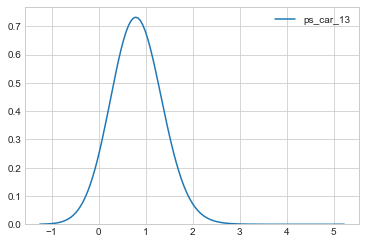

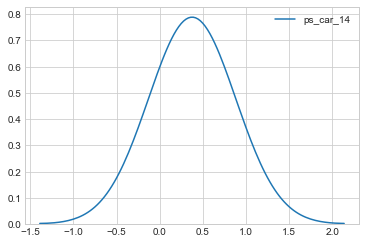

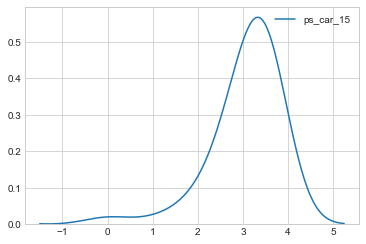

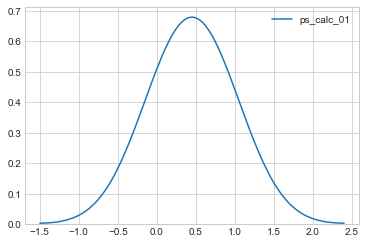

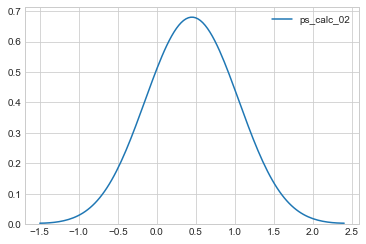

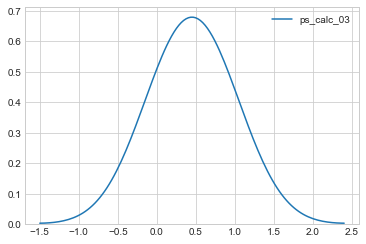

In [20]:
for i in interval_names : 
    plt.figure(i)
    sns.set_style('whitegrid')
    sns.kdeplot(data[i], bw=0.5)
    

The interval level variables all tend to follow normal distribution with a few outliers. This problem thus also needs to be addressed. 

#### Count Plots for Ordinal Variables 

C:\Users\prady\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


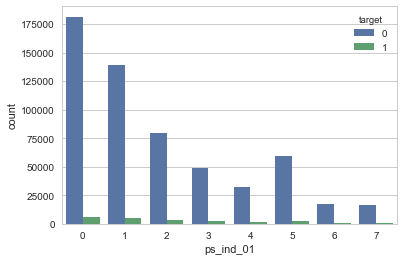

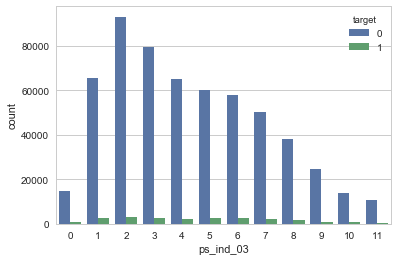

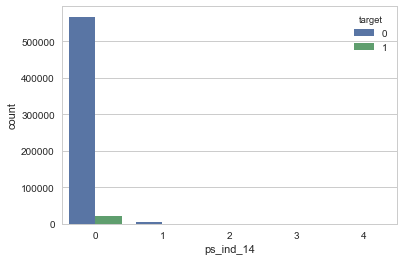

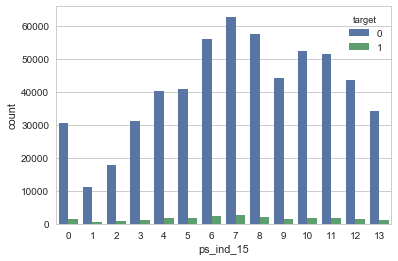

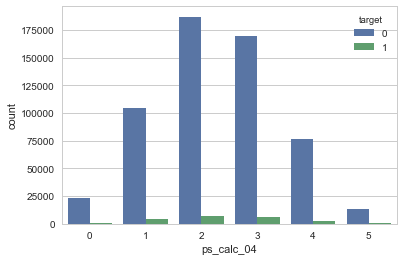

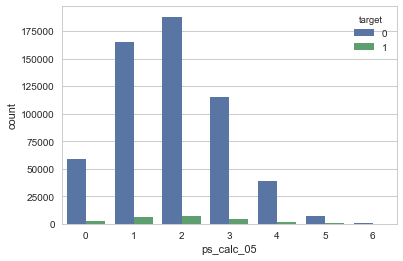

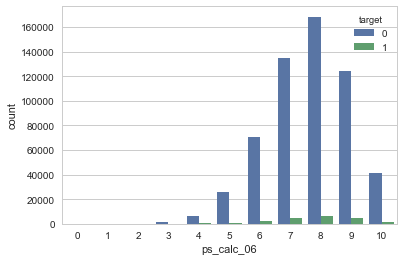

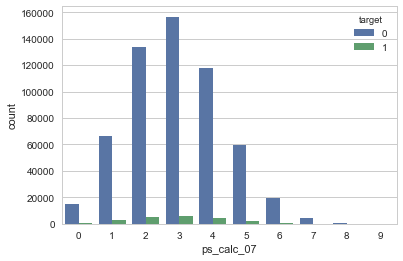

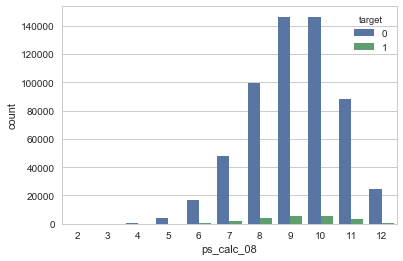

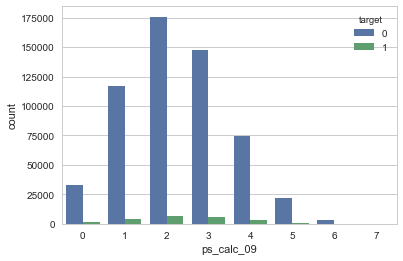

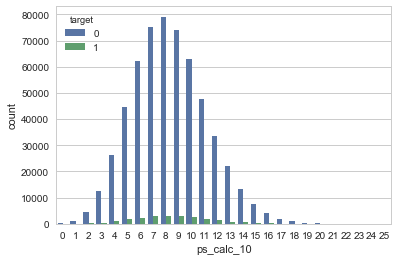

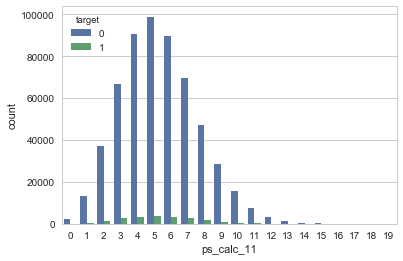

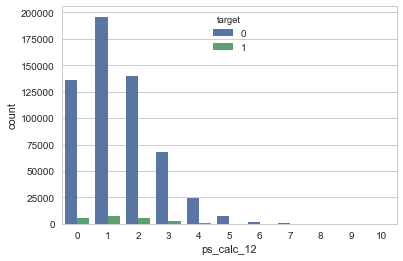

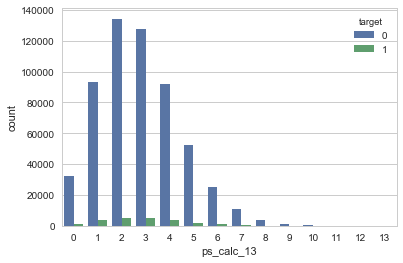

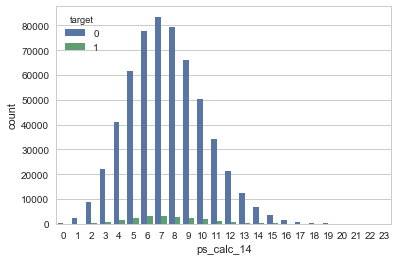

In [19]:
for i in ordinal_names : 
    plt.figure(i)
    sns.countplot(x=i,data=data, hue="target")

Most ordinal variabls seem to be normally distributed with an exception of a couple of extreme examples namely ps_ind_14 and ps_ind_01. 

## Data Preprocessing 

Following are the data preprocessing techniques that are needed based on the data vizualization :            
    1) Missing value imputation for the rest of the variables.        
    2) Dimensional reduction of variables specially after one hot encoding of categorical variables.       
    3) Outlier treatement of interval level variables.       
    4) Undersampling the dataset to adjust the imbalance in the dataset.   
    
    
    
    

### Missing Value Imputations 

Due to low information available about the dataset, missing value imputations are done on the assumption that the missing values are missing at random.Two missing value imputation techniques would be used. MICE algorithm and imputation by Mode and Mean. 

##### MICE 

In [21]:
data_mice = MICE().complete(np.array(data))

[MICE] Completing matrix with shape (595212, 58)
[MICE] Starting imputation round 1/110, elapsed time 0.324
[MICE] Starting imputation round 2/110, elapsed time 8.527
[MICE] Starting imputation round 3/110, elapsed time 15.638
[MICE] Starting imputation round 4/110, elapsed time 22.649
[MICE] Starting imputation round 5/110, elapsed time 29.647
[MICE] Starting imputation round 6/110, elapsed time 36.946
[MICE] Starting imputation round 7/110, elapsed time 43.955
[MICE] Starting imputation round 8/110, elapsed time 50.949
[MICE] Starting imputation round 9/110, elapsed time 57.990
[MICE] Starting imputation round 10/110, elapsed time 65.005
[MICE] Starting imputation round 11/110, elapsed time 72.003
[MICE] Starting imputation round 12/110, elapsed time 79.045
[MICE] Starting imputation round 13/110, elapsed time 86.126
[MICE] Starting imputation round 14/110, elapsed time 93.161
[MICE] Starting imputation round 15/110, elapsed time 100.184
[MICE] Starting imputation round 16/110, elaps

In [25]:
columns = list(data)

In [26]:
data_mice = pd.DataFrame(data=data_mice,    
             columns=columns)  

##### Imputation by Mode and Mean 

In [27]:
for i in list(data) :
    
    if  ("cat" in i or "bin" in i == True) : 
        
        values = data[i]
        imputer = Imputer(strategy="most_frequent")
        imputer.fit(data[[i]])
        data[i]=imputer.transform(data[[i]]).ravel()


    else:
        
        values = data[i]
        imputer = Imputer(strategy="mean")
        
        imputer.fit(data[[i]])
        data[i]=imputer.transform(data[[i]]).ravel()


Two seperate datasets are created , one data with imputations from MICE algorithm and the other data with imputations from mean and mode.   
data : This is the dataset with imputations from mean and mode .   
data_mice : This is the dataset with imputations from the MICE algorithm.   

For Modelling purposes , both the techniques of imputation will be used and compared. 

In [28]:
data_mice[cat_names+bin_names] = np.round(data_mice[cat_names+bin_names]) # rounding the imputed values to represent categories 

data_mice[cat_names+bin_names] = data_mice[cat_names+bin_names].astype(int)
# Converting categorical features to integer type to represent categories for mice imputed dataset . 
data[cat_names+bin_names] = data[cat_names+bin_names].astype(int)
# Converting categorical features to integer type to represent categories for mean and mode imputed dataset .

The categorical variables need to be one hot encoded for modelling purposes.  

In [29]:
dum = pd.get_dummies(data=data, columns=cat_names) # One hot encoding for categorical variables. 
dum_mice = pd.get_dummies(data=data_mice, columns=cat_names) # One hot encoding for categorical variables. 
dum = pd.concat([data[bin_names],dum], axis=1) # Making a new dataframe with just categorical variables 
                                                # including binary variables. from mean and mode imputed dataset. 
dum_mice = pd.concat([data_mice[bin_names], dum_mice], axis=1) # Making a new dataframe with just categorical variables 
                                                               # including binary variables for MICE imputed dataset.     

In [30]:
np.shape(dum)

(595212, 236)

In [31]:
np.shape(dum_mice)

(595212, 236)

### Dimension Reduction 

Principal Component analysis was done for dimension reduction of one hot encoded categorical variables.Their total count is 236 PCA was applied on the dataset of both the imputed methods seperately. 

##### PCA for mean and mode imputed data. 

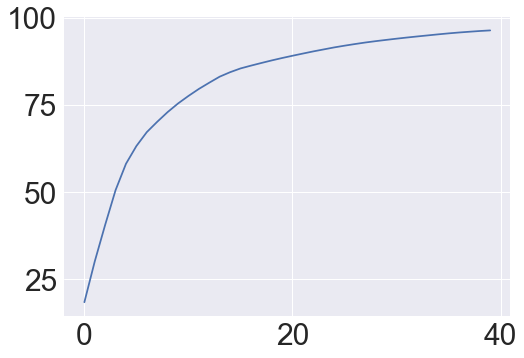

In [32]:
#PCA for mean and mode imputed data
pca = PCA(n_components=40)

pca.fit(dum)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)

From the plot above it is evident that about 30 components would explain 95 % of variance and thus we would end up taking 30 components as features. 

In [33]:
pca = PCA(n_components=30) # Object with number of principal components as 30
pca.fit(dum)
coef = pca.transform(dum)
comp_data = pd.DataFrame(coef) # making a dataframe of the components. 

#### PCA for MICE imputed data . 

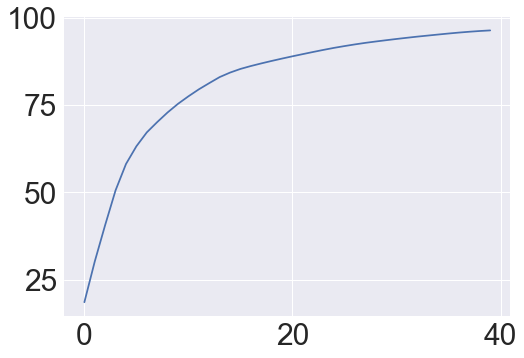

In [34]:
#PCA for MICE imputed data
pca = PCA(n_components=40)

pca.fit(dum_mice)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)

Again , about 30 variables explain almost 95 % of variance and thus 30 components are chosen . 

In [35]:
pca = PCA(n_components=30) # Object with 30 principal components. 
pca.fit(dum_mice)
coef = pca.transform(dum_mice)
comp_mice = pd.DataFrame(coef) # MAking a dataframe for principal components of mice imputer data

#### Concatenating the Principal components and deleting redundant variables from the  2 main datasets . 

In [36]:
data=data.drop(bin_names+cat_names, axis=1)
data_mice = data_mice.drop(bin_names+cat_names,axis=1)

In [37]:
data = pd.concat([data,comp_data], axis=1)
data_mice = pd.concat([data_mice,comp_mice], axis=1)

### Outlier Treatement 

Outlier treatement is done on the basis of flooring and capping the interval level variables at 1 percentile and 99 percentile respectively . 

In [38]:
for i in interval_names : 
    
    data[i] = pd.Series(mstats.winsorize(data[i], limits=[0.01, 0.01])) 
    
for i in interval_names : 
    data_mice[i] = pd.Series(mstats.winsorize(data_mice[i], limits=[0.01, 0.01])) 

### Undersampling for balancing data 

When undersampling the data , test and train splits are done before undersampling. This prevents introducing biasness to the test set. 

In [39]:
train, test = train_test_split(data, test_size=0.2) # splitting the mean and mode imputed data into test and train set
train_mice, test_mice = train_test_split(data_mice, test_size=0.2) # Splitting the MICE imputed data into test and train set.

In [40]:
#Oversampling for mean and mode imputed dataset.
ros = RandomOverSampler() # Object for random oversampling
train_x, train_y = ros.fit_sample(train.drop("target",axis=1), train["target"])

In [41]:
coln = list(train.drop("target",axis=1))

In [42]:
train_x = pd.DataFrame(data=train_x,    
             columns=coln) # Since the RandomOverSampler returns numpy arrays , the arrays are changed back to dataframe arrays , the arrays are changed back to dataframe
train_y = pd.DataFrame(data=train_y, columns = ["target"])

In [43]:
#Oversampling for MICE imputed dataset
ros = RandomOverSampler()
train_mice_x, train_mice_y = ros.fit_sample(train_mice.drop("target",axis=1), train_mice["target"])

In [44]:
train_mice_x = pd.DataFrame(data=train_mice_x,    
             columns=coln)

train_mice_y = pd.DataFrame(data=train_mice_y, columns = ["target"])

In [67]:
np.shape(train)

(476169, 57)

In [68]:
train.groupby('target').count()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,...,20,21,22,23,24,25,26,27,28,29
target,,,,,,,,,,,,,,,,,,,,,
0.0,458805,458805,458805,458805,458805,458805,458805,458805,458805,458805,...,458805,458805,458805,458805,458805,458805,458805,458805,458805,458805
1.0,17364,17364,17364,17364,17364,17364,17364,17364,17364,17364,...,17364,17364,17364,17364,17364,17364,17364,17364,17364,17364


## Modelling 

### Artificial Neural Network 

**ANN on mean and mode imputed dataset . **

ANN model is trained on the dataset with Principal components of categorical and binary variables, interval level and ordinal variables .The model is trained on 2 seperate datasets with MICE imputations and imputations with mean and mode. Negative Log Loss is chosen for model selection.    
Model Tuning is done by tuning the hyper parameters while using 5-Fold Crossvalidation for every possible combination of tuning parameter. Due to the time cost , 5 fold crossvalidation was used instead of 10 fold crossvalidation . 

In [70]:
param_grid={
'learning_rate': ["constant", "invscaling", "adaptive"],
'hidden_layer_sizes': (25,35,45),
'activation': ["logistic", "relu", "tanh"]
} # Initializing the grid for parameter tuning for ANN
ann_m = MLPClassifier()
ann_m = GridSearchCV(estimator=ann_m,param_grid=param_grid,scoring="neg_log_loss", n_jobs=-1,verbose=3,cv=5) # Scoring is done on negative log loss 
                                                                                                             #due to imbalanced data
ann_m.fit(train_x,train_y)

#Print the tuned parameters and score
print("Tuned Parameters {}".format(ann_m.best_params_)) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 95.4min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 119.2min finished
C:\Users\prady\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuned Parameters {'activation': 'tanh', 'hidden_layer_sizes': 45, 'learning_rate': 'constant'}


In [71]:
# Testing the model on the test set. 
pred = ann_m.predict(test.drop("target",axis=1)) # Predicitng the test set 
true = test ["target"]
print("Cohen Kappa Score " ,cohen_kappa_score(pred,np.array(true))) # Checking the Kappa score for predicted values 
print("Accuracy ", accuracy_score(np.array(true),pred)) # Checking the accuracy for the predicted values 


Cohen Kappa Score  0.024203755396
Accuracy  0.660416824173


**Retraining the model on tuned parameters and predictions **

In [113]:
ann_m = MLPClassifier(learning_rate = "constant",
hidden_layer_sizes= (45,45,45),
activation= "tanh" )
ann_m.fit(train_x,train_y)

C:\Users\prady\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(45, 45, 45), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [79]:
pred = ann_m.predict(test.drop("target",axis=1)) # Predicitng the test set 
true = test ["target"]
print("Cohen Kappa Score " ,cohen_kappa_score(pred,np.array(true))) # Checking the Kappa score for predicted values 
print("Accuracy ", accuracy_score(np.array(true),pred)) # Checking the accuracy for the predicted values 


Cohen Kappa Score  0.095852887446
Accuracy  0.719487916131


In [ ]:
filename = 'ann_m.sav'
joblib.dump(ann_m, filename) # Saving the model after 2 hours of training . 

In [78]:
ann_m = joblib.load('ann_m.sav')

**ANN on MICE imputed dataset **

In [98]:
param_grid={
'learning_rate': ["constant", "invscaling", "adaptive"],
'hidden_layer_sizes': (25,35,45),
'activation': ["logistic", "relu", "tanh"]
}# Initializing the grid for parameter tuning for ANN
ann_mice = MLPClassifier()
ann_mice = GridSearchCV(estimator=ann_mice,param_grid=param_grid,scoring="neg_log_loss", n_jobs=-1,verbose=3,cv=5)
ann_mice.fit(train_mice_x,train_mice_y)

# Print the tuned parameters and score
print("Tuned Parameters {}".format(ann_mice.best_params_)) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 89.7min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 112.7min finished
C:\Users\prady\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuned Parameters {'activation': 'tanh', 'hidden_layer_sizes': 45, 'learning_rate': 'invscaling'}


In [99]:
pred = ann_mice.predict(test_mice.drop("target",axis=1))
true = test_mice ["target"]
print("Cohen Kappa Score " ,cohen_kappa_score(pred,np.array(true)))
print("Accuracy ", accuracy_score(np.array(true),pred))


Cohen Kappa Score  0.0220381459837
Accuracy  0.621556916408


**Retraining the model on tuned parameters and predictions**

In [116]:
ann_mice = MLPClassifier(learning_rate = "invscaling",
hidden_layer_sizes= (45,45,45),
activation= "tanh" )
ann_mice.fit(train_x,train_y)

C:\Users\prady\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(45, 45, 45), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [81]:
pred_ann = ann_mice.predict(test_mice.drop("target",axis=1))
true_ann = test_mice ["target"]
print("Cohen Kappa Score " ,cohen_kappa_score(pred_ann,np.array(true_ann)))
print("Accuracy ", accuracy_score(np.array(true_ann),pred_ann))


Cohen Kappa Score  0.0308150340229
Accuracy  0.704518535319


In [118]:
filename = 'ann_mice.sav'
joblib.dump(ann_mice, filename) # Saving the model after 2 hours of training . 

['ann_mice.sav']

In [80]:
ann_mice = joblib.load('ann_mice.sav')

ANN Model on Mice imputed dataset gives better accuracy and Kappa values. This is simply due to the fact that MICE would preserve the distribution of the variables. Thus , model based imputations seem to be a better choice when faced with missing data with no information on them.

### XG Boost

**XG Boost on mean and mode imputed dataset**

In [44]:
 
model = XGBClassifier()
max_depth = [4,8,6]
n_estimators = [120,140,160]
param_grid = dict(max_depth=max_depth, n_estimators = n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=3)
grid_result = grid_search.fit(train_x, train_y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 85.1min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 263.1min finished
C:\Users\prady\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prady\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: -0.531067 using {'max_depth': 8, 'n_estimators': 160}


**Retraining the model on tuned parameters and predictions** 

In [46]:
xg_m = XGBClassifier(max_depth= 8, n_estimators= 160)
xg_m.fit(train_x,train_y)

C:\Users\prady\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prady\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=160,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [47]:
pred = xg_m.predict(test.drop("target",axis=1))
true = test["target"]
print("Cohen Kappa Score " ,cohen_kappa_score(pred,np.array(true)))
print("Accuracy ", accuracy_score(np.array(true),pred))


Cohen Kappa Score  0.0389218549695
Accuracy  0.759893483867


In [48]:
filename = 'xg_m.sav'
joblib.dump(xg_m, filename) 

['xg_m.sav']

In [49]:
xg_m = joblib.load('xg_m.sav')

**XG Boost on mice imputed dataset**

In [52]:
# Tuning LEarning Rates and number of estimators. 
model = XGBClassifier()
max_depth = [4,8,6]
n_estimators = [120,140,160]
param_grid = dict(max_depth=max_depth, n_estimators = n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=3)
grid_result = grid_search.fit(train_mice_x, train_mice_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 86.8min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 263.6min finished
C:\Users\prady\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prady\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: -0.525689 using {'max_depth': 8, 'n_estimators': 160}


**Retraining the model on tuned parameters and predictions**

In [59]:
xg_mice = XGBClassifier(max_depth= 8, n_estimators= 160)
xg_mice.fit(train_mice_x,train_mice_y)

C:\Users\prady\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prady\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=160,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [73]:
pred_xg = xg_mice.predict(test_mice.drop("target",axis=1))
true_xg = test_mice["target"]
print("Cohen Kappa Score " ,cohen_kappa_score(pred_xg,np.array(true_xg)))
print("Accuracy ", accuracy_score(np.array(true_xg),pred_xg))


Cohen Kappa Score  0.121342638484
Accuracy  0.78518686525


In [62]:
filename = 'xg_mice.sav'
joblib.dump(xg_mice, filename) 

['xg_mice.sav']

In [69]:
xg_mice = joblib.load('xg_mice.sav')

### Stacking Classification models 

**Stacking models for mode and mean imputed data**

In [75]:
# Correlation between the predictions of values from XG Boost and ANN 
np.corrcoef(pred_xg,pred_ann)

array([[ 1.        ,  0.16069857],
       [ 0.16069857,  1.        ]])

In [70]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

In [71]:
kappa_scorer = make_scorer(cohen_kappa_score)
clf1 = XGBClassifier(max_depth= 8, n_estimators= 160)
clf2 = MLPClassifier(activation = "tanh", hidden_layer_sizes = (45,45,45) , learning_rate = "constant")
 
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2],
                          use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)


In [73]:
sclf.fit(train_x,train_y)

C:\Users\prady\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prady\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prady\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prady\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

StackingClassifier(average_probas=False,
          classifiers=[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=160,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=...e=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)],
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          use_features_in_secondary=False, use_probas=True, verbose=0)

In [75]:
y_pred = sclf.predict(test.drop("target",axis=1))

true = test["target"]
print("Accuracy ", accuracy_score(np.array(true),y_pred))


Accuracy  0.791545911981


In [76]:
filename = 'sclf.sav'
joblib.dump(sclf, filename) 

['sclf.sav']

In [77]:
sclf = joblib.load('sclf.sav')

**Stacking models for mice imputed data**

In [78]:
kappa_scorer = make_scorer(cohen_kappa_score)
clf1 = XGBClassifier(max_depth= 8, n_estimators= 160)
clf2 = MLPClassifier(activation = "tanh", hidden_layer_sizes = (45,45,45) , learning_rate = "invscaling")
 
lr = LogisticRegression()
sclf_mice = StackingClassifier(classifiers=[clf1, clf2],
                          use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)


In [82]:
sclf_mice.fit(train_mice_x,train_mice_y)

C:\Users\prady\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prady\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prady\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prady\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

StackingClassifier(average_probas=False,
          classifiers=[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=160,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=...e=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)],
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          use_features_in_secondary=False, use_probas=True, verbose=0)

In [83]:
y_pred = sclf_mice.predict(test_mice.drop("target",axis=1))

true = test_mice["target"]
print("Accuracy ", accuracy_score(np.array(true),y_pred))

Accuracy  0.799383416077


In [84]:
filename = 'sclf_mice.sav'
joblib.dump(sclf_mice, filename) 

['sclf_mice.sav']

In [85]:
sclf_mice = joblib.load('sclf_mice.sav')

### K-Means Clustering 

#### K Means Clustering for Mean and Mode imputed data 

K means clustering is done on 2 datasets imputed by MICE algorithm and mean/mode . Number of clusters are determined by the elbow method and then the clusters are made again to check for their BIC values. Silhoutte Distance was also tried but due to repetitive memory error , it was discontinued. BIC is also a better cluster validation metric than Silhoutte Distance because Silhoutte distances cannot be calculated for clustering algorithms trying to determine probability distributions. 

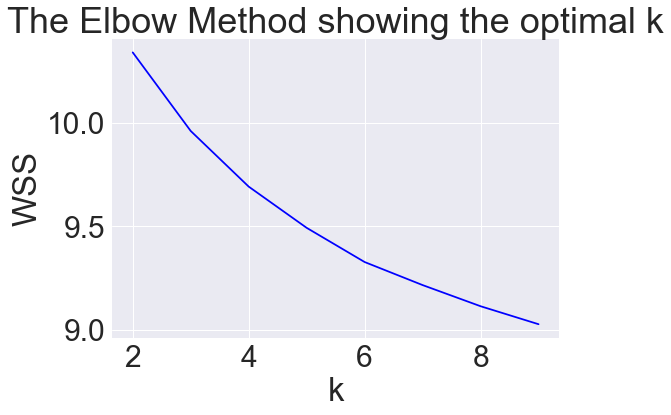

In [45]:
# k means determine k
distortions = [] # Variable to store the WSS 
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data.drop("target",axis=1)) # Initializing the KMeans object with its inputs . 
    kmeanModel.fit(data.drop("target",axis=1)) # Running the Kmeans Algorithm 
    distortions.append(sum(np.min(cdist(data.drop("target",axis=1), kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.drop("target",axis=1).shape[0])
    # Wss calculations. 
    
    #label = kmeanModel.labels_
    #sil_coeff = silhouette_score(data.drop("target",axis=1), label, metric='euclidean')
    #print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()
 

In [46]:
# Function for calculating the BIC of K means clusters. 

def compute_bic(kmeans,X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term  # BIC calculation 

    return(BIC)

In [47]:
kmean_m = KMeans(n_clusters=6).fit(data.drop("target",axis=1))
#kmean_m.fit(data.drop("target",axis=1))


In [48]:
compute_bic(kmean_m,np.array(data.drop("target",axis=1))) # Computing BIC for K means 6 clusters . 

-56295080.883005977

#### K Means Clustering for MICE imputed data

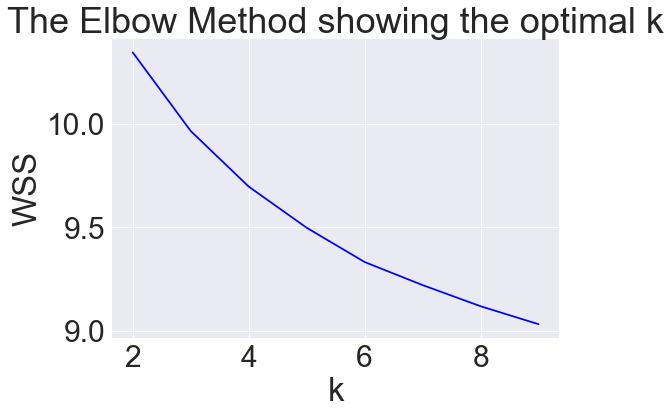

In [49]:
# k means determine k
distortions = [] # List for storing wss 
K = range(2,10)
for k in K:
    kmeanModel_mice = KMeans(n_clusters=k).fit(data_mice.drop("target",axis=1))
    kmeanModel_mice.fit(data_mice.drop("target",axis=1))
    distortions.append(sum(np.min(cdist(data_mice.drop("target",axis=1), kmeanModel_mice.cluster_centers_, 'euclidean'), axis=1)) / data_mice.drop("target",axis=1).shape[0])
    #label = kmeanModel.labels_
    #sil_coeff = silhouette_score(data.drop("target",axis=1), label, metric='euclidean')
    #print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the plot above , the elbow point is not clear but the rate of change of wss visually seems to be the elast at about 6 clusters. 

In [68]:
kmean_mice = KMeans(n_clusters=6).fit(data_mice.drop("target",axis=1))
#kmean_m.fit(data.drop("target",axis=1))

In [69]:
compute_bic(kmean_mice,np.array(data_mice.drop("target",axis=1))) # Computing BIC values for k means 6 clusters . 

-56311779.716886014

### Expectation Maximization 

#### EM clustering for Mean and Mode imputed dataset 

EM Clustering is done by making clusters on the range of values from 1 to 15 . BIC was then determined to select the number of clusters and the clusters were made again.  

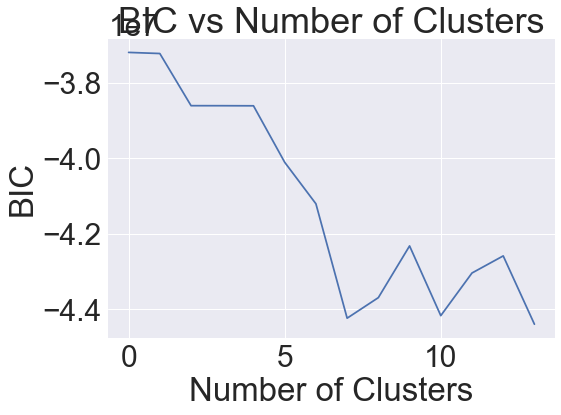

In [51]:
n_components = np.arange(1, 15)
#Create an empty vector in which to store BIC scores
BIC = np.zeros(n_components.shape)

for i, n in enumerate(n_components):
    #Fit gmm to data for each value in n_components vector
    gmm_m = GaussianMixture(n_components=n,
          covariance_type='tied')
    gmm_m.fit(data.drop("target",axis=1))
    #Store BIC scores in a list
    BIC[i] = gmm_m.bic(data.drop("target",axis=1))

#Plot resulting BIC list (Scores(n_components))
plt.plot(BIC)
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.title('BIC vs Number of Clusters')
plt.show()

Since the BIC is the lowest at 7 clusters , EM is trained again for 7 clusters and BIC is calculated 

In [56]:
gmm_mice = GaussianMixture(n_components=2,
          covariance_type='tied')
gmm_mice.fit(data_mice.drop("target",axis=1))
#Store BIC scores in a list
gmm_mice.bic(data_mice.drop("target",axis=1))

-36761360.050274774

#### EM Clustering for MICE Imputed dataset 

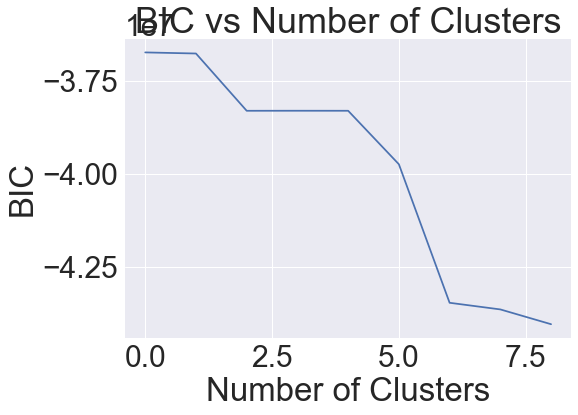

In [54]:
n_components = np.arange(1, 10)
#Create an empty vector in which to store BIC scores
BIC = np.zeros(n_components.shape)

for i, n in enumerate(n_components):
    #Fit gmm to data for each value in n_components vector
    gmm_mice = GaussianMixture(n_components=n,
          covariance_type='tied')
    gmm_mice.fit(data_mice.drop("target",axis=1))
    #Store BIC scores in a list
    BIC[i] = gmm_mice.bic(data_mice.drop("target",axis=1))

#Plot resulting BIC list (Scores(n_components))
plt.plot(BIC)
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.title('BIC vs Number of Clusters')
plt.show()

In [57]:
gmm_mice = GaussianMixture(n_components=2,
          covariance_type='tied')
gmm_mice.fit(data_mice.drop("target",axis=1))
#Store BIC scores in a list
gmm_mice.bic(data_mice.drop("target",axis=1))

-36761336.372097336

When using BIC for cluster validation , we consider the bigger the value of BIC the better. Thus if we look individually, Kmeans algorithm works slightly better for MICE imputed dataset. However , EM tends to do significantly better for mean and mode imputed dataset. This can be attributed to that fact that EM would be better at figuring out the probability distribution of "simpler" distribution that results with simple imputations by mean and mode. 

When comparing the EM Clustering and K Means Clustering , surprisingly K-Means Clustering has lower BIC than EM Clustering. 
This can however be attributed to the fact that there are 57 varibales in the dataset and curse of dimensionality seems to hit probability distribution determinations more than eucledian distances in 57-dimensional hyperspace.  